In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

In [3]:
# Method to show image
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(8,8))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

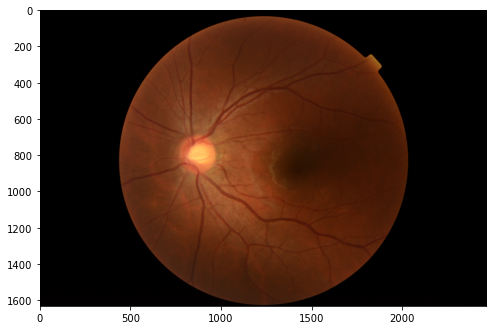

In [4]:
#Just taken one image vor visualization
path = r'C:\Users\kshit\Desktop\test\Major Project\Dataset\1_normal\NL_001.png'
test_img = cv.imread(path)
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)

In [5]:
#RGB image have 3 dimensions
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 1632
Height RGB = 2464
Dimension RGB = 3


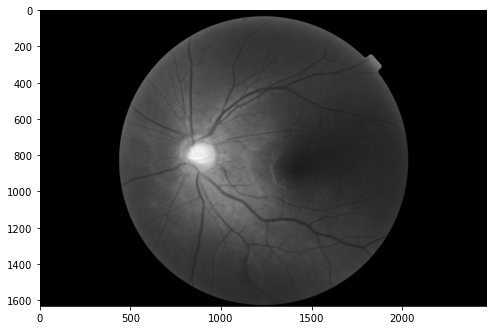

In [6]:
test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
show_image(test_img_gray)

In [7]:
#grayscale image doesn't have dimenssion because it have one colour ranges from 0-255
width, height = test_img_gray.shape
print(f'Width Grayscale = {width}')
print(f'Height Grayscale = {height}')
print(f'Image Shape Grayscale {test_img_gray.shape}')

Width Grayscale = 1632
Height Grayscale = 2464
Image Shape Grayscale (1632, 2464)


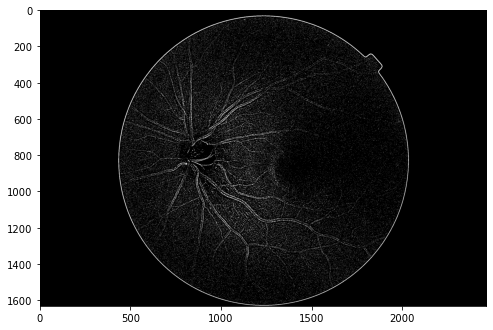

In [8]:
#Binary image it have range from 0-1
test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

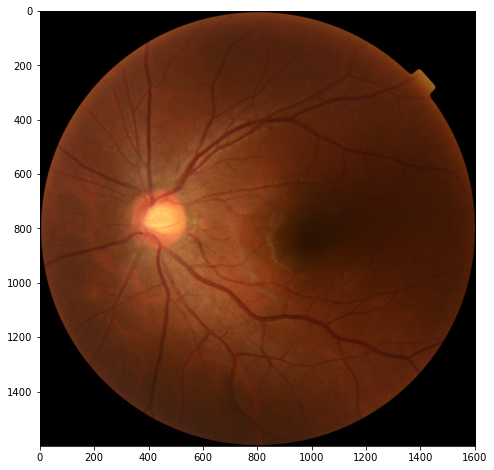

In [9]:
#cropping image
cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv.contourArea, reverse=True)
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    test_img_ROI = test_img[y:y+h, x:x+w]
    break
show_image(test_img_ROI)

In [10]:
width, height, dimension = test_img_ROI.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 1600
Height = 1601
Dimension = 3


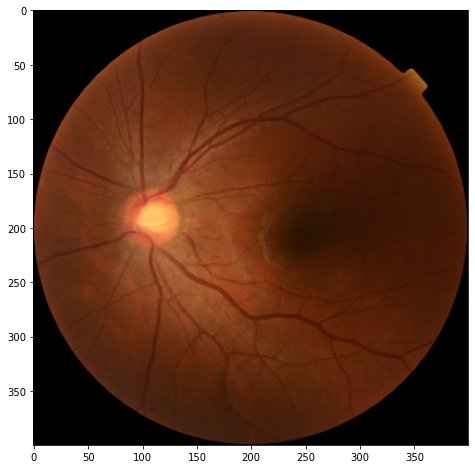

In [11]:
#reducing dimensions because of costly computation
test_img_ROI_resize = cv.resize(test_img_ROI, (int(width/4), int(height/4)))
show_image(test_img_ROI_resize)

In [12]:
width, height, dimension = test_img_ROI_resize.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 400
Height = 400
Dimension = 3


In [13]:
#function to perform all the preprocessing
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
    
    return test_img_ROI_resize_gray

In [14]:
import pathlib

In [15]:
data_dir='C:/Users/kshit/Desktop/test/Major Project/Dataset'
data_dir = pathlib.Path(data_dir)
images_count = len(list(data_dir.glob('*/*.png')))
print(images_count)

600


In [16]:
#we have 600 images

In [17]:
images_dict = {
    'normal':list(data_dir.glob('1_normal/*')),
    'cataract':list(data_dir.glob('2_cataract/*'))
}
labels_dict ={
    'normal':0,
    'cataract':1,
}

In [18]:
str(images_dict['normal'][0])

'C:\\Users\\kshit\\Desktop\\test\\Major Project\\Dataset\\1_normal\\NL_001.png'

In [19]:
X,y = [],[]
for typ_dis,images in images_dict.items(): #typ_dia name gives tittle and images is a list containg all paths of all images
    for image in images:      #image is the selection of a perticular image from all image list path
        img = cv.imread(str(image))
        new_img = preprocessingImage(img)
        X.append(new_img)
        y.append(labels_dict[typ_dis])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
(len(X),len(y),X[0])

(600,
 600,
 array([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8))

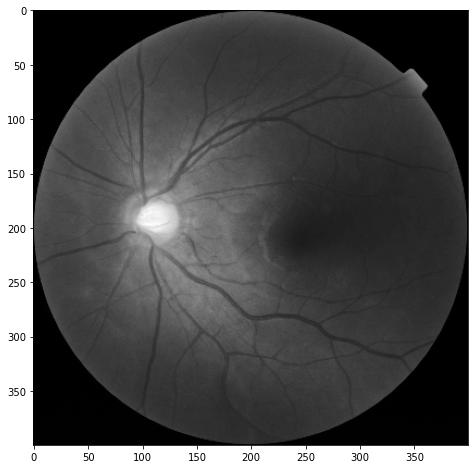

In [22]:
show_image(X[0])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [24]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

480 480 120 120


In [25]:
y_train[:100]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [26]:
X_train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1]], dtype=uint8)

In [27]:
X_train.shape

(480, 400, 400)

In [28]:
# Machine Learning models Expect 2D data set
nsamples, nx, ny = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny))

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

In [42]:
def graphplot(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['Normal','Cataract'],
                yticklabels=['Normal','Cataract'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.figure(figsize=(50, 50));

# Machine Learning Models

### 1. Support Vector Machine

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        70
           1       0.65      0.94      0.77        50

    accuracy                           0.77       120
   macro avg       0.80      0.79      0.77       120
weighted avg       0.82      0.77      0.77       120



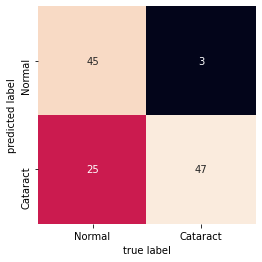

<Figure size 3600x3600 with 0 Axes>

In [43]:
#SVM Model
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train2, y_train)
model_svm.score(X_test2, y_test)
f1_score(y_test, model_svm.predict(X_test2), average='macro')
y_pred_svm = model_svm.predict(X_test2)
print(classification_report(y_test, y_pred_svm))
graphplot(y_test, y_pred_svm)

### 2. Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        70
           1       0.82      1.00      0.90        50

    accuracy                           0.91       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.92      0.91      0.91       120



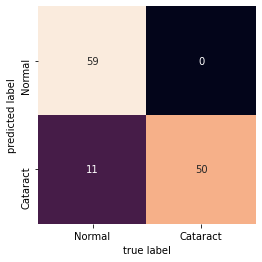

<Figure size 3600x3600 with 0 Axes>

In [44]:
#RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train2, y_train)
model_rfc.score(X_test2, y_test)
f1_score(y_test, model_rfc.predict(X_test2), average='macro')
y_pred_rfc = model_rfc.predict(X_test2)
print(classification_report(y_test, y_pred_rfc))
graphplot(y_test, y_pred_rfc)

### 3. Logistic Regression

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        70
           1       0.79      0.88      0.83        50

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.85      0.85       120



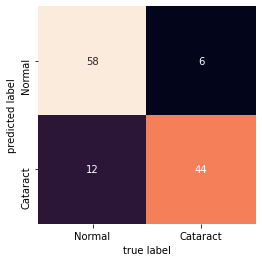

<Figure size 3600x3600 with 0 Axes>

In [46]:
#LogisticRegression Model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs', max_iter=10)
model_lr.fit(X_train2, y_train)
model_lr.score(X_test2, y_test)
f1_score(y_test, model_lr.predict(X_test2), average='macro')
y_pred_lr = model_lr.predict(X_test2)
print(classification_report(y_test, y_pred_lr))
graphplot(y_test, y_pred_lr)

### 4. k-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.83      0.49      0.61        70
           1       0.54      0.86      0.67        50

    accuracy                           0.64       120
   macro avg       0.69      0.67      0.64       120
weighted avg       0.71      0.64      0.64       120



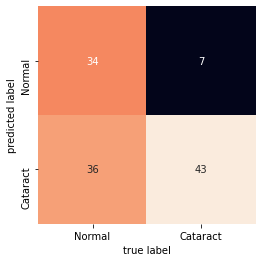

<Figure size 3600x3600 with 0 Axes>

In [47]:
#KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train2, y_train)
model_kn.score(X_test2, y_test)
f1_score(y_test, model_kn.predict(X_test2), average='macro')
y_pred_kn = model_kn.predict(X_test2)
print(classification_report(y_test, y_pred_kn))
graphplot(y_test, y_pred_kn)

### 5. Naive Bayes

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        70
           1       0.50      0.52      0.51        50

    accuracy                           0.58       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.59      0.58      0.58       120



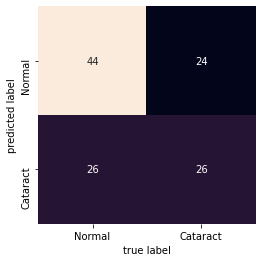

<Figure size 3600x3600 with 0 Axes>

In [48]:
#NaiveBayes  
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train2, y_train)
model_nb.score(X_test2, y_test)
f1_score(y_test, model_nb.predict(X_test2), average='macro')
y_pred_nb = model_nb.predict(X_test2)
print(classification_report(y_test, y_pred_nb))
graphplot(y_test, y_pred_nb)

# DEEP LEARNING MODELS

In [54]:
X_train.shape

(480, 400, 400)

In [55]:
import tensorflow as tf

### 1. Neural Network with 0 Hidden Layer

In [56]:
#Artificial Neural network with 0 Hidden layer
def checkbestfit(x):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(400,400)),
        tf.keras.layers.Dense(x, activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10)

    yp = model.predict(X_test)
    print(max(yp),min(yp))

    y_pred = []
    for i in yp:
        if i>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return model.evaluate(X_test,  y_test),classification_report(y_test,y_pred)

In [57]:
res = {}
low_lim = 100
upp_lim = 1000
for i in range(low_lim,upp_lim,100):
    x,y = checkbestfit(i)
    res[i] = [x,y]

    


Epoch 1/10
15/15 [==============================] - 3s 174ms/step - loss: 9553.0023 - accuracy: 0.4931
Epoch 2/10
15/15 [==============================] - 2s 163ms/step - loss: 4019.0624 - accuracy: 0.4593
Epoch 3/10
15/15 [==============================] - 2s 148ms/step - loss: 2261.9377 - accuracy: 0.5006
Epoch 4/10
15/15 [==============================] - 2s 164ms/step - loss: 3411.6385 - accuracy: 0.5565
Epoch 5/10
15/15 [==============================] - 2s 154ms/step - loss: 1972.3196 - accuracy: 0.5273
Epoch 6/10
15/15 [==============================] - 2s 148ms/step - loss: 971.3341 - accuracy: 0.6580
Epoch 7/10
15/15 [==============================] - 2s 155ms/step - loss: 257.6228 - accuracy: 0.7720
Epoch 8/10
15/15 [==============================] - 2s 160ms/step - loss: 221.3612 - accuracy: 0.7544
Epoch 9/10
15/15 [==============================] - 2s 166ms/step - loss: 295.6616 - accuracy: 0.7398
Epoch 10/10
15/15 [==============================] - 2s 148ms/step - loss: 22

15/15 [==============================] - 14s 941ms/step - loss: 2289.0844 - accuracy: 0.5753
Epoch 5/10
15/15 [==============================] - 14s 927ms/step - loss: 2650.4406 - accuracy: 0.5935
Epoch 6/10
15/15 [==============================] - 14s 941ms/step - loss: 2606.2273 - accuracy: 0.6095
Epoch 7/10
15/15 [==============================] - 14s 971ms/step - loss: 1880.9598 - accuracy: 0.5995
Epoch 8/10
15/15 [==============================] - 15s 970ms/step - loss: 608.7697 - accuracy: 0.7393
Epoch 9/10
15/15 [==============================] - 15s 986ms/step - loss: 1111.2262 - accuracy: 0.6809
Epoch 10/10
15/15 [==============================] - 15s 1s/step - loss: 1054.9672 - accuracy: 0.6896
[0.] [0.]
4/4 [==============================] - 1s 176ms/step - loss: 4646.5190 - accuracy: 0.5833


C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 55s 3s/step - loss: 29370.1782 - accuracy: 0.5016
Epoch 2/10
15/15 [==============================] - 20s 1s/step - loss: 1764.5472 - accuracy: 0.4933
Epoch 3/10
15/15 [==============================] - 21s 1s/step - loss: 428.9484 - accuracy: 0.4899
Epoch 4/10
15/15 [==============================] - 18s 1s/step - loss: 356.7258 - accuracy: 0.4961
Epoch 5/10
15/15 [==============================] - 17s 1s/step - loss: 120.8994 - accuracy: 0.5953
Epoch 6/10
15/15 [==============================] - 17s 1s/step - loss: 72.0671 - accuracy: 0.6218
Epoch 7/10
15/15 [==============================] - 17s 1s/step - loss: 25.1388 - accuracy: 0.7906
Epoch 8/10
15/15 [==============================] - 17s 1s/step - loss: 52.5314 - accuracy: 0.6847
Epoch 9/10
15/15 [==============================] - 16s 1s/step - loss: 147.1973 - accuracy: 0.5713
Epoch 10/10
15/15 [==============================] - 16s 1s/step - loss: 96.1492 - accuracy: 0.6533


In [59]:
m = 0
print("Accuracy report of models")
print("Model    1st_Layer   Accuracy")
for i in range(low_lim,upp_lim,100):
    print("  ",int(i/100),"      ",i,"      ",(res[i][0][1]*100))
    if(m<(res[i][0][1]*100)):
        m = (res[i][0][1]*100)
        ind = i
print("\n\n\nClassifiation Report of",int(ind/100),"Model Because of its maximum Accuracy")
print(res[ind][1])

Accuracy report of models
Model    1st_Layer   Accuracy
   1        100        67.5000011920929
   2        200        43.33333373069763
   3        300        85.00000238418579
   4        400        60.83333492279053
   5        500        66.66666865348816
   6        600        64.99999761581421
   7        700        82.4999988079071
   8        800        58.33333134651184
   9        900        59.16666388511658



Classifiation Report of 3 Model Because of its maximum Accuracy
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        70
           1       0.88      0.74      0.80        50

    accuracy                           0.85       120
   macro avg       0.86      0.83      0.84       120
weighted avg       0.85      0.85      0.85       120



### 2. Neural Network with 1 Hidden Layer

In [68]:
#Artificial Neural Network model
def checkbestfit2(x):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(400,400)),
        tf.keras.layers.Dense(x, activation='relu'),
        tf.keras.layers.Dense(2*x, activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10)

    yp = model.predict(X_test)
    print(max(yp),min(yp))

    y_pred = []
    for i in yp:
        if i>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return model.evaluate(X_test,  y_test),classification_report(y_test,y_pred)

In [69]:
res = {}
low_lim = 100
upp_lim = 1000
for i in range(low_lim,upp_lim,100):
    x,y = checkbestfit2(i)
    res[i] = [x,y]

Epoch 1/10
15/15 [==============================] - 3s 171ms/step - loss: 2601.0449 - accuracy: 0.5117
Epoch 2/10
15/15 [==============================] - 3s 185ms/step - loss: 1269.9438 - accuracy: 0.4863
Epoch 3/10
15/15 [==============================] - 2s 152ms/step - loss: 763.8953 - accuracy: 0.5304
Epoch 4/10
15/15 [==============================] - 2s 163ms/step - loss: 244.9080 - accuracy: 0.4953
Epoch 5/10
15/15 [==============================] - 2s 159ms/step - loss: 209.9114 - accuracy: 0.4651
Epoch 6/10
15/15 [==============================] - 2s 163ms/step - loss: 155.3301 - accuracy: 0.4928
Epoch 7/10
15/15 [==============================] - 2s 165ms/step - loss: 145.3802 - accuracy: 0.4923
Epoch 8/10
15/15 [==============================] - 3s 164ms/step - loss: 135.5140 - accuracy: 0.5606
Epoch 9/10
15/15 [==============================] - 3s 173ms/step - loss: 31.4518 - accuracy: 0.5767
Epoch 10/10
15/15 [==============================] - 3s 181ms/step - loss: 34.870

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 10s 615ms/step - loss: 9223.0046 - accuracy: 0.4650
Epoch 2/10
15/15 [==============================] - 9s 603ms/step - loss: 815.9823 - accuracy: 0.5128
Epoch 3/10
15/15 [==============================] - 9s 625ms/step - loss: 368.2814 - accuracy: 0.5550
Epoch 4/10
15/15 [==============================] - 10s 635ms/step - loss: 459.2875 - accuracy: 0.4975
Epoch 5/10
15/15 [==============================] - 9s 603ms/step - loss: 438.4665 - accuracy: 0.4896
Epoch 6/10
15/15 [==============================] - 9s 587ms/step - loss: 126.1219 - accuracy: 0.4928
Epoch 7/10
15/15 [==============================] - 9s 602ms/step - loss: 88.3030 - accuracy: 0.5566
Epoch 8/10
15/15 [==============================] - 9s 595ms/step - loss: 260.8000 - accuracy: 0.4963
Epoch 9/10
15/15 [==============================] - 9s 586ms/step - loss: 251.6938 - accuracy: 0.4698
Epoch 10/10
15/15 [==============================] - 9s 597ms/step - loss: 14.62

In [70]:
m = 0
print("Accuracy report of models")
print("Model    1st_Layer   Hidden    Accuracy")
for i in range(low_lim,upp_lim,100):
    print("  ",int(i/100),"      ",i,"   ",i*2,"      ",(res[i][0][1]*100))
    if(m<(res[i][0][1]*100)):
        m = (res[i][0][1]*100)
        ind = i
print("\n\n\nClassifiation Report of",int(ind/100),"Model Because of its maximum Accuracy")
print(res[ind][1])

Accuracy report of models
Model    1st_Layer   Hidden    Accuracy
   1        100     200        68.33333373069763
   2        200     400        50.0
   3        300     600        72.50000238418579
   4        400     800        41.66666567325592
   5        500     1000        55.83333373069763
   6        600     1200        57.499998807907104
   7        700     1400        70.83333134651184
   8        800     1600        42.500001192092896
   9        900     1800        44.16666626930237



Classifiation Report of 3 Model Because of its maximum Accuracy
              precision    recall  f1-score   support

           0       0.97      0.54      0.70        70
           1       0.60      0.98      0.75        50

    accuracy                           0.73       120
   macro avg       0.79      0.76      0.72       120
weighted avg       0.82      0.72      0.72       120



### 4. Neural Network with 2 Hidden Layer

In [71]:
#Artificial Neural Network model
def checkbestfit3(x):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(400,400)),
        tf.keras.layers.Dense(x, activation='relu'),
        tf.keras.layers.Dense(2*x, activation='relu'),
        tf.keras.layers.Dense(3*x, activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10)

    yp = model.predict(X_test)
    print(max(yp),min(yp))

    y_pred = []
    for i in yp:
        if i>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return model.evaluate(X_test,  y_test),classification_report(y_test,y_pred)

In [72]:
res = {}
low_lim = 100
upp_lim = 1000
for i in range(low_lim,upp_lim,100):
    x,y = checkbestfit3(i)
    res[i] = [x,y]

Epoch 1/10
15/15 [==============================] - 3s 146ms/step - loss: 2062.4217 - accuracy: 0.5071
Epoch 2/10
15/15 [==============================] - 2s 150ms/step - loss: 584.6989 - accuracy: 0.5084
Epoch 3/10
15/15 [==============================] - 2s 149ms/step - loss: 498.2990 - accuracy: 0.5608
Epoch 4/10
15/15 [==============================] - 2s 153ms/step - loss: 583.3715 - accuracy: 0.4889
Epoch 5/10
15/15 [==============================] - 2s 155ms/step - loss: 522.3430 - accuracy: 0.4480
Epoch 6/10
15/15 [==============================] - 2s 160ms/step - loss: 30.5285 - accuracy: 0.5249
Epoch 7/10
15/15 [==============================] - 2s 160ms/step - loss: 0.6944 - accuracy: 0.4509
Epoch 8/10
15/15 [==============================] - 2s 157ms/step - loss: 0.6933 - accuracy: 0.4806
Epoch 9/10
15/15 [==============================] - 2s 148ms/step - loss: 0.6931 - accuracy: 0.5356
Epoch 10/10
15/15 [==============================] - 2s 151ms/step - loss: 0.6928 - accu

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 11s 236ms/step - loss: 5410.6299 - accuracy: 0.4737
Epoch 2/10
15/15 [==============================] - 4s 237ms/step - loss: 717.1217 - accuracy: 0.5150
Epoch 3/10
15/15 [==============================] - 4s 253ms/step - loss: 185.2409 - accuracy: 0.5530
Epoch 4/10
15/15 [==============================] - 4s 264ms/step - loss: 80.1086 - accuracy: 0.5595
Epoch 5/10
15/15 [==============================] - 4s 257ms/step - loss: 139.3657 - accuracy: 0.5180
Epoch 6/10
15/15 [==============================] - 4s 253ms/step - loss: 103.0288 - accuracy: 0.4715
Epoch 7/10
15/15 [==============================] - 4s 244ms/step - loss: 17.8837 - accuracy: 0.4475
Epoch 8/10
15/15 [==============================] - 4s 257ms/step - loss: 0.6933 - accuracy: 0.4903
Epoch 9/10
15/15 [==============================] - 4s 255ms/step - loss: 0.6930 - accuracy: 0.5401
Epoch 10/10
15/15 [==============================] - 4s 245ms/step - loss: 0.6921 - ac

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 6s 369ms/step - loss: 6067.7150 - accuracy: 0.5047
Epoch 2/10
15/15 [==============================] - 6s 382ms/step - loss: 402.4453 - accuracy: 0.5602
Epoch 3/10
15/15 [==============================] - 5s 365ms/step - loss: 128.2593 - accuracy: 0.4524
Epoch 4/10
15/15 [==============================] - 6s 382ms/step - loss: 51.5074 - accuracy: 0.4999
Epoch 5/10
15/15 [==============================] - 6s 372ms/step - loss: 51.0231 - accuracy: 0.5413
Epoch 6/10
15/15 [==============================] - 5s 361ms/step - loss: 10.2725 - accuracy: 0.4880
Epoch 7/10
15/15 [==============================] - 6s 377ms/step - loss: 0.6931 - accuracy: 0.5170
Epoch 8/10
15/15 [==============================] - 6s 370ms/step - loss: 0.6929 - accuracy: 0.5142
Epoch 9/10
15/15 [==============================] - 6s 370ms/step - loss: 0.6923 - accuracy: 0.5266
Epoch 10/10
15/15 [==============================] - 6s 377ms/step - loss: 0.6918 - accura

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 8s 461ms/step - loss: 7064.2809 - accuracy: 0.4374
Epoch 2/10
15/15 [==============================] - 7s 495ms/step - loss: 1620.7797 - accuracy: 0.4766
Epoch 3/10
15/15 [==============================] - 7s 480ms/step - loss: 493.4375 - accuracy: 0.5110
Epoch 4/10
15/15 [==============================] - 7s 480ms/step - loss: 331.9641 - accuracy: 0.4740
Epoch 5/10
15/15 [==============================] - 7s 470ms/step - loss: 49.3226 - accuracy: 0.4639
Epoch 6/10
15/15 [==============================] - 7s 473ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 7/10
15/15 [==============================] - 7s 481ms/step - loss: 0.6930 - accuracy: 0.5181
Epoch 8/10
15/15 [==============================] - 7s 465ms/step - loss: 0.6935 - accuracy: 0.4864
Epoch 9/10
15/15 [==============================] - 7s 483ms/step - loss: 0.6916 - accuracy: 0.5434
Epoch 10/10
15/15 [==============================] - 7s 472ms/step - loss: 0.6916 - accur

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 11s 618ms/step - loss: 8856.1212 - accuracy: 0.4904
Epoch 2/10
15/15 [==============================] - 9s 627ms/step - loss: 854.9532 - accuracy: 0.5448
Epoch 3/10
15/15 [==============================] - 9s 602ms/step - loss: 66.9005 - accuracy: 0.5064
Epoch 4/10
15/15 [==============================] - 9s 616ms/step - loss: 0.6930 - accuracy: 0.5294
Epoch 5/10
15/15 [==============================] - 9s 589ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 6/10
15/15 [==============================] - 9s 608ms/step - loss: 0.6919 - accuracy: 0.5346
Epoch 7/10
15/15 [==============================] - 9s 604ms/step - loss: 0.6922 - accuracy: 0.5240
Epoch 8/10
15/15 [==============================] - 9s 612ms/step - loss: 0.6912 - accuracy: 0.5366
Epoch 9/10
15/15 [==============================] - 9s 618ms/step - loss: 0.6962 - accuracy: 0.4702
Epoch 10/10
15/15 [==============================] - 9s 591ms/step - loss: 0.6933 - accuracy:

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 12s 736ms/step - loss: 8839.4219 - accuracy: 0.5303
Epoch 2/10
15/15 [==============================] - 11s 746ms/step - loss: 1002.8941 - accuracy: 0.4958
Epoch 3/10
15/15 [==============================] - 11s 726ms/step - loss: 106.6357 - accuracy: 0.5705
Epoch 4/10
15/15 [==============================] - 11s 712ms/step - loss: 37.8695 - accuracy: 0.4751
Epoch 5/10
15/15 [==============================] - 11s 727ms/step - loss: 0.6932 - accuracy: 0.5128
Epoch 6/10
15/15 [==============================] - 11s 718ms/step - loss: 0.6921 - accuracy: 0.5539
Epoch 7/10
15/15 [==============================] - 11s 702ms/step - loss: 0.6923 - accuracy: 0.5282
Epoch 8/10
15/15 [==============================] - 11s 727ms/step - loss: 0.6917 - accuracy: 0.5368
Epoch 9/10
15/15 [==============================] - 11s 723ms/step - loss: 0.6928 - accuracy: 0.5131
Epoch 10/10
15/15 [==============================] - 11s 712ms/step - loss: 0.6918

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 18s 1s/step - loss: 11580.1557 - accuracy: 0.4421
Epoch 2/10
15/15 [==============================] - 15s 991ms/step - loss: 262.3423 - accuracy: 0.5062
Epoch 3/10
15/15 [==============================] - 15s 991ms/step - loss: 75.4672 - accuracy: 0.5400
Epoch 4/10
15/15 [==============================] - 15s 983ms/step - loss: 0.6933 - accuracy: 0.4486
Epoch 5/10
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5040
Epoch 6/10
15/15 [==============================] - 15s 1s/step - loss: 0.6921 - accuracy: 0.5386
Epoch 7/10
15/15 [==============================] - 17s 1s/step - loss: 0.6924 - accuracy: 0.5209
Epoch 8/10
15/15 [==============================] - 16s 1s/step - loss: 0.6930 - accuracy: 0.5108
Epoch 9/10
15/15 [==============================] - 17s 1s/step - loss: 0.6927 - accuracy: 0.5170
Epoch 10/10
15/15 [==============================] - 16s 1s/step - loss: 0.6917 - accuracy: 0.5301
[0.

In [73]:
m = 0
print("Accuracy report of models")
print("Model    1st_Layer   Hidden    2nd Hidden     Accuracy")
for i in range(low_lim,upp_lim,100):
    print("  ",int(i/100),"      ",i,"   ",i*2,"     ",i*3,"        ",(res[i][0][1]*100))
    if(m<(res[i][0][1]*100)):
        m = (res[i][0][1]*100)
        ind = i
print("\n\n\nClassifiation Report of",int(ind/100),"Model Because of its maximum Accuracy")
print(res[ind][1])

Accuracy report of models
Model    1st_Layer   Hidden    2nd Hidden     Accuracy
   1        100     200       300          41.66666567325592
   2        200     400       600          41.66666567325592
   3        300     600       900          41.66666567325592
   4        400     800       1200          41.66666567325592
   5        500     1000       1500          41.66666567325592
   6        600     1200       1800          44.16666626930237
   7        700     1400       2100          41.66666567325592
   8        800     1600       2400          42.500001192092896
   9        900     1800       2700          43.33333373069763



Classifiation Report of 6 Model Because of its maximum Accuracy
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        70
           1       0.43      1.00      0.60        50

    accuracy                           0.44       120
   macro avg       0.71      0.52      0.34       120
weighted avg       

# 3. Neural Network with 1 Hidden Layer

In [74]:
#Artificial Neural Network model
def checkbestfit4(x):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(400,400)),
        tf.keras.layers.Dense(x, activation='relu'),
        tf.keras.layers.Dense(x/2, activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10)

    yp = model.predict(X_test)
    print(max(yp),min(yp))

    y_pred = []
    for i in yp:
        if i>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return model.evaluate(X_test,  y_test),classification_report(y_test,y_pred)

In [75]:
res = {}
low_lim = 100
upp_lim = 1000
for i in range(low_lim,upp_lim,100):
    x,y = checkbestfit4(i)
    res[i] = [x,y]

Epoch 1/10
15/15 [==============================] - 3s 150ms/step - loss: 3734.3485 - accuracy: 0.4683
Epoch 2/10
15/15 [==============================] - 2s 151ms/step - loss: 782.7162 - accuracy: 0.5276
Epoch 3/10
15/15 [==============================] - 2s 151ms/step - loss: 463.0427 - accuracy: 0.5117
Epoch 4/10
15/15 [==============================] - 2s 160ms/step - loss: 219.4639 - accuracy: 0.5506
Epoch 5/10
15/15 [==============================] - 2s 164ms/step - loss: 123.6176 - accuracy: 0.5785
Epoch 6/10
15/15 [==============================] - 2s 166ms/step - loss: 34.6783 - accuracy: 0.6959
Epoch 7/10
15/15 [==============================] - 2s 162ms/step - loss: 115.3255 - accuracy: 0.6320
Epoch 8/10
15/15 [==============================] - 2s 158ms/step - loss: 365.4291 - accuracy: 0.5384
Epoch 9/10
15/15 [==============================] - 2s 157ms/step - loss: 122.0850 - accuracy: 0.5069
Epoch 10/10
15/15 [==============================] - 2s 160ms/step - loss: 32.2247

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
15/15 [==============================] - 9s 565ms/step - loss: 9781.4997 - accuracy: 0.5144
Epoch 2/10
15/15 [==============================] - 9s 605ms/step - loss: 2488.0443 - accuracy: 0.5333
Epoch 3/10
15/15 [==============================] - 9s 586ms/step - loss: 548.2446 - accuracy: 0.5738
Epoch 4/10
15/15 [==============================] - 9s 595ms/step - loss: 1359.1301 - accuracy: 0.5171
Epoch 5/10
15/15 [==============================] - 9s 567ms/step - loss: 911.1911 - accuracy: 0.5119
Epoch 6/10
15/15 [==============================] - 9s 590ms/step - loss: 1215.9149 - accuracy: 0.4852
Epoch 7/10
15/15 [==============================] - 9s 573ms/step - loss: 590.3036 - accuracy: 0.4819
Epoch 8/10
15/15 [==============================] - 9s 608ms/step - loss: 188.0963 - accuracy: 0.5670
Epoch 9/10
15/15 [==============================] - 10s 644ms/step - loss: 201.4129 - accuracy: 0.5865
Epoch 10/10
15/15 [==============================] - 9s 576ms/step - loss: 18

In [76]:
m = 0
print("Accuracy report of models")
print("Model    1st_Layer   Hidden     Accuracy")
for i in range(low_lim,upp_lim,100):
    print("  ",int(i/100),"      ",i,"   ",i/2,"        ",(res[i][0][1]*100))
    if(m<(res[i][0][1]*100)):
        m = (res[i][0][1]*100)
        ind = i
print("\n\n\nClassifiation Report of",int(ind/100),"Model Because of its maximum Accuracy")
print(res[ind][1])

Accuracy report of models
Model    1st_Layer   Hidden     Accuracy
   1        100     50.0          80.83333373069763
   2        200     100.0          64.99999761581421
   3        300     150.0          80.0000011920929
   4        400     200.0          58.33333134651184
   5        500     250.0          80.0000011920929
   6        600     300.0          77.49999761581421
   7        700     350.0          58.33333134651184
   8        800     400.0          72.50000238418579
   9        900     450.0          82.4999988079071



Classifiation Report of 9 Model Because of its maximum Accuracy
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        70
           1       0.77      0.82      0.80        50

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.83       120

